In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from colorspacious import cspace_converter

### 2. Wind Visualization

In [2]:
df_wind = pd.read_csv("wind.csv")
df_wind.head()

,LON,LAT,UTM_X,UTM_Y,MORPH,wind
0,122.52307,32.455536,-109289.882,3609459.656,sea,7.59
1,122.53369,32.455975,-108286.076,3609447.524,sea,7.59
2,122.54428,32.456398,-107285.223,3609433.886,sea,7.60
3,122.55487,32.456830,-106284.328,3609421.348,sea,7.59
4,122.56546,32.457256,-105283.491,3609408.244,sea,7.60


#### 2.1. Distortion: Spherical vs Projection


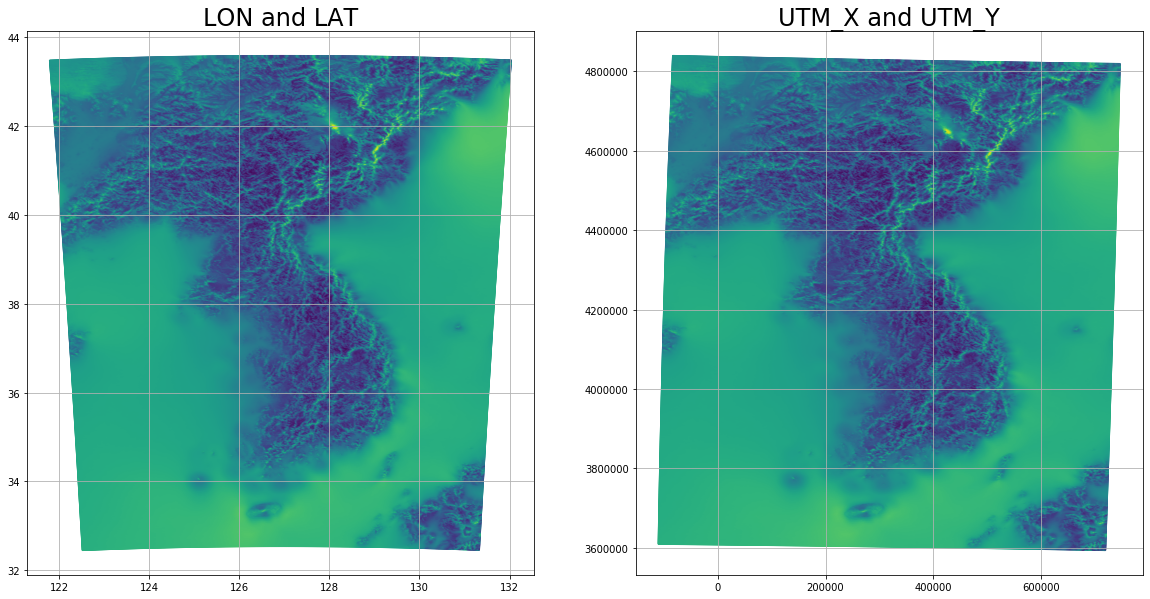

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

Xs = ["LON", "UTM_X"]
Ys = ["LAT", "UTM_Y"]

for ax, X, Y in zip(axes, Xs, Ys):
    ax.scatter(df_wind[X], df_wind[Y], s=1, c=df_wind["wind"], cmap="viridis")
    ax.set_title(f"{X} and {Y}", fontsize=24)
    ax.grid("on")  

plt.savefig("26_ccmap_code2_02.png")
plt.show()

#### 2.2. Distortion: Aspect Ratio

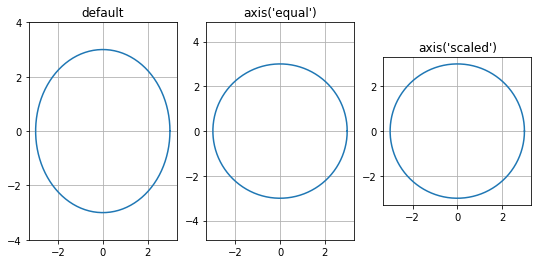

In [4]:
# 예제 원 데이터 (반지름=3)
an = np.linspace(0, 2 * np.pi, 100)
X, Y = 3*np.cos(an), 3*np.sin(an)

fig, axes = plt.subplots(ncols=3, figsize=(9, 4))

titles = ["default", "axis('equal')", "axis('scaled')"]

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.plot(X, Y)
    ax.grid("on")
    ax.set_title(title)
    ticklabels = ax.get_xticks()
    ax.set_yticks(ticklabels)
    
    if i == 1:
        ax.axis("equal")
    elif i == 2:
        ax.axis("scaled")

plt.savefig("26_ccmap_code2_04.png")        
plt.show()        

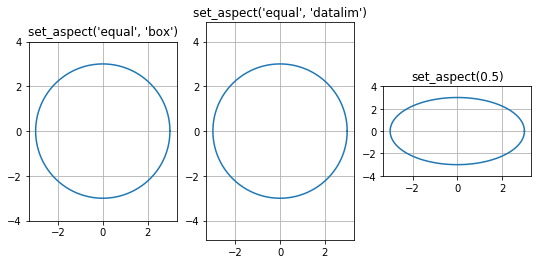

In [5]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4))

titles = ["set_aspect('equal', 'box')", "set_aspect('equal', 'datalim')", "set_aspect(0.5)"]

for i, (ax, title) in enumerate(zip(axes, titles)):
    ax.plot(X, Y)
    ax.grid("on")
    ax.set_title(title)
    ticklabels = ax.get_xticks()
    ax.set_yticks(ticklabels)
    
    if i == 0:
        ax.set_aspect("equal", "box")
    elif i == 1:
        ax.set_aspect("equal", "datalim")
    elif i == 2:
        ax.set_aspect(0.5)

plt.savefig("26_ccmap_code2_05.png")        
plt.show()        

In [6]:
# 무의미한 여백을 피하기 위한 데이터 범위 다듬기
df_trim = df_wind.loc[df_wind["UTM_X"] < 700000].loc[df_wind["UTM_X"] > -80000].loc[df_wind["UTM_Y"] < 4800000].loc[df_wind["UTM_Y"] > 3620000]


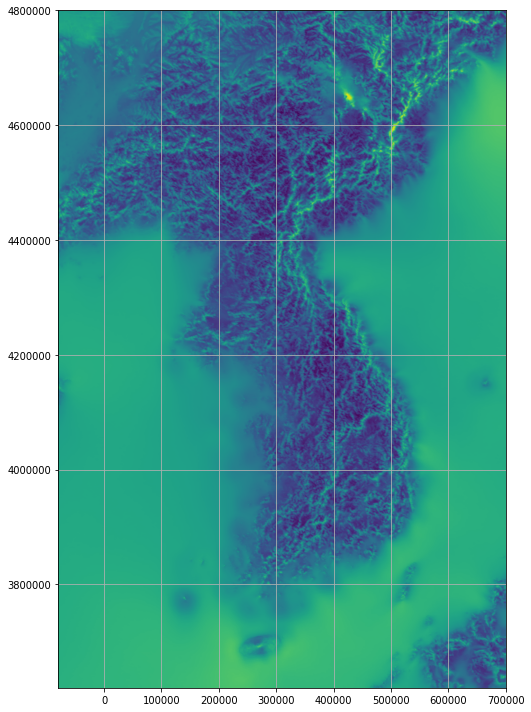

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(df_trim["UTM_X"], df_trim["UTM_Y"], s=1, c=df_trim["wind"], cmap="viridis")
ax.set_aspect("equal", "box")
ax.set_xlim(-80000, 700000)
ax.set_ylim(3620000, 4800000)
ax.grid("on")

plt.tight_layout()
plt.savefig("26_ccmap_code2_06.png")
plt.show()

#### 2.3. Axes Aesthetics

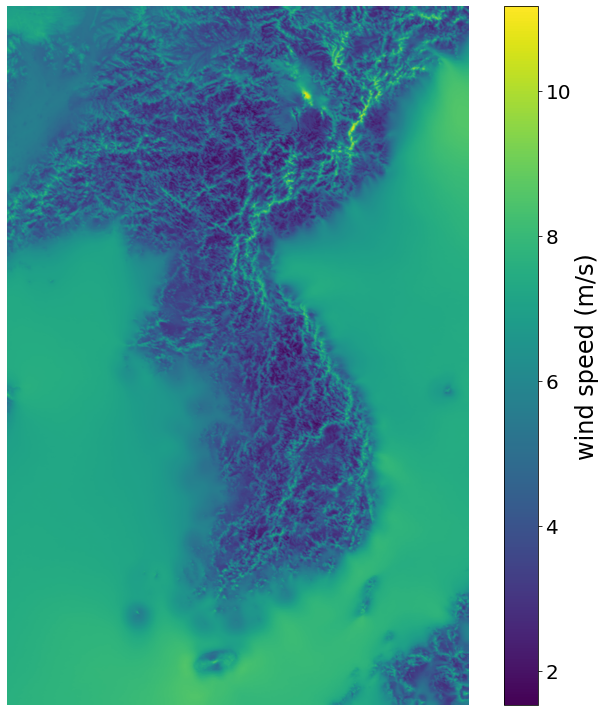

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))

im = ax.scatter(df_trim["UTM_X"], df_trim["UTM_Y"], s=1, c=df_trim["wind"], cmap="viridis")
ax.set_aspect("equal", "box")
ax.set_xlim(-80000, 700000)
ax.set_ylim(3620000, 4800000)
ax.axis("off")  # 윤곽선 삭제
ax.grid("off")  # grid 삭제

cbar = plt.colorbar(im, ax=ax)                            # colorbar 추가 
cbar.set_label("wind speed (m/s)", fontsize=24)           # colorbar label
cbar.ax.tick_params(labelsize=20)                         # colorbar 숫자 fontsize

plt.tight_layout()
plt.savefig("26_ccmap_code2_07.png")
plt.show()

#### 2.5. Data Aesthetics

##### 2.5.1. Efficient Color Space

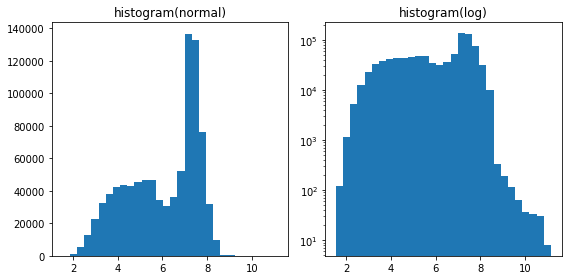

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].hist(df_trim["wind"], bins=30)
ax[1].hist(df_trim["wind"], bins=30)
ax[1].set_yscale("log")

ax[0].set_title("histogram(normal)")
ax[1].set_title("histogram(log)")

plt.tight_layout()
plt.savefig("26_ccmap_code2_08.png")
plt.show()

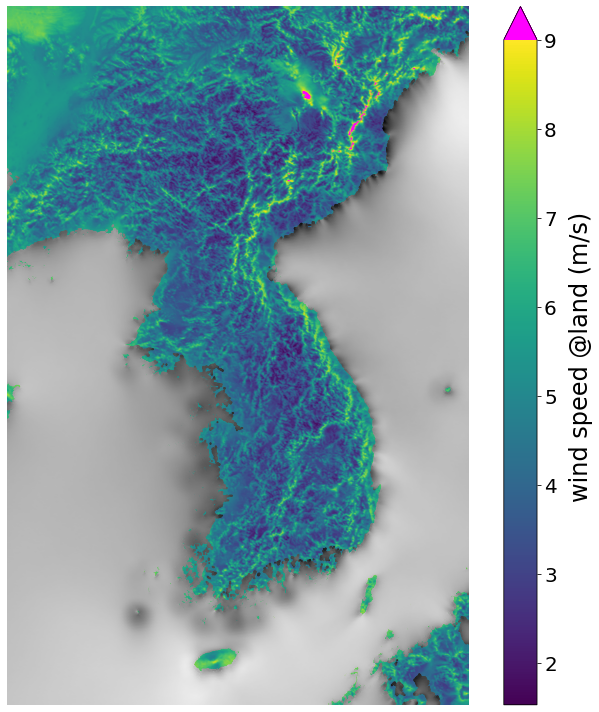

In [32]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=(10, 10))

cmap_ = "viridis"
cmap = cm.get_cmap(cmap_)
cmap.set_over("magenta")  # over 색상 지정

# 육지 : viridis
im = ax.scatter(df_trim["UTM_X"].loc[df_trim["MORPH"]!="sea"], 
                df_trim["UTM_Y"].loc[df_trim["MORPH"]!="sea"], s=1, 
                c=df_trim["wind"].loc[df_trim["MORPH"]!="sea"], cmap=cmap, vmax=9)

# 바다 : gist_gray
ax.scatter(df_trim["UTM_X"].loc[df_trim["MORPH"]=="sea"], 
           df_trim["UTM_Y"].loc[df_trim["MORPH"]=="sea"], s=1, 
           c=df_trim["wind"].loc[df_trim["MORPH"]=="sea"], cmap="gist_gray", vmax=9)

ax.set_aspect("equal", "box")
ax.set_xlim(-80000, 700000)
ax.set_ylim(3620000, 4800000)
ax.axis("off")  # 윤곽선 삭제
ax.grid("off")  # grid 삭제

cbar = plt.colorbar(im, ax=ax, extend="max")    # extend=max 추가
cbar.set_label("wind speed @land (m/s)", fontsize=24, labelpad=12)           
cbar.ax.tick_params(labelsize=20)                         

plt.tight_layout()
plt.savefig("26_ccmap_code2_09.png")
plt.show()

##### 2.5.2. Colormap Customization

In [48]:
def plot_L(cmaps, titles=None, filename=None):
    N = len(cmaps)
    assert N > 0  # 최소한 1개의 컬러맵이 있어야 함.
    
    if titles==None:  # titles 입력이 없으면 cmap 이름을 title로 사용
        titles = [str(cmap) for cmap in cmaps]  # string이 아닐 경우를 대비해 string으로 변환
    
    if filename==None: # filename 입력이 없으면 cmap 명단을 이름으로 사용
        filename = "L_" + "_".join(titles) + ".png"

    x = np.linspace(0.0, 1.0, 256) 
    
    fig, axes = plt.subplots(ncols=N, figsize=(3*N, 4), sharey=True)

    for i, (ax, cmap, title) in enumerate(zip(axes, cmaps, titles)):  
        rgb = cm.get_cmap(cmap)(x)[:, :3]
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        y = lab[:, 0]                                    
        ax.scatter(x, y, c=x, cmap=cmap, s=500, zorder=3)  # Data
        ax.scatter(x, y, c="k", s=550, zorder=2)           # outline
        ax.plot(x, y, c="k", zorder=4)                     # center line

        ax.xaxis.set_tick_params(labelsize=20) 
        ax.yaxis.set_tick_params(labelsize=20) 
        ax.set_title(title, fontdict={"fontsize":24}, pad=24)
        ax.spines['top'].set_visible(False)    
        ax.spines['right'].set_visible(False)  
        ax.spines['bottom'].set_position(('outward', 10)) 
        ax.grid("on")                          

        if i == 0:
            ax.set_ylabel("Lightness $L^*$", fontdict={"fontsize":24})
            ax.spines['left'].set_position(('outward', 10))
        else:
            ax.spines['left'].set_visible(False)

    plt.tight_layout()  
    plt.savefig(filename, dpi=150)  # 고해상도 저장
    plt.show()

In [64]:
from matplotlib.colors import ListedColormap
from copy import deepcopy

Blues_r = cm.get_cmap("Blues_r", 256)(np.linspace(0, 1, 256))
Greens_r = cm.get_cmap("Greens_r", 256)(np.linspace(0, 1, 256))

boundary = 85
Greens_Blues_1_ = np.vstack((Greens_r[:boundary], Blues_r[boundary:]))
Greens_Blues_1 = ListedColormap(Greens_Blues_1_)

Blues_r_2 = deepcopy(Blues_r)
Blues_r_2[:,:3] = Blues_r_2[:,:3]*0.8+0.2 
Greens_Blues_2_ = np.vstack((Greens_r[:boundary], Blues_r_2[boundary:]))
Greens_Blues_2 = ListedColormap(Greens_Blues_2_)

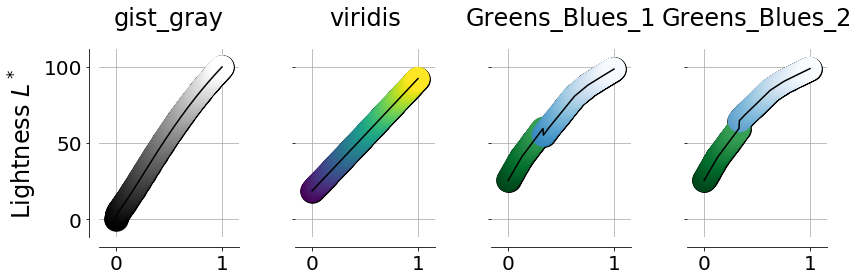

In [65]:
plot_L(["gist_gray", "viridis", Greens_Blues_1, Greens_Blues_2], titles=["gist_gray", "viridis", "Greens_Blues_1", "Greens_Blues_2"])

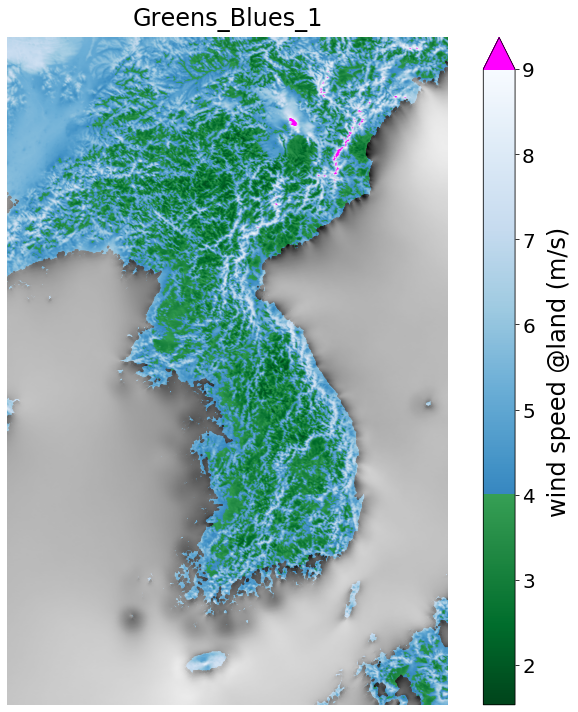

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))

cmap = Greens_Blues_1  # colormap 지정
cmap.set_over("magenta")  

# 육지 : viridis
im = ax.scatter(df_trim["UTM_X"].loc[df_trim["MORPH"]!="sea"], 
                df_trim["UTM_Y"].loc[df_trim["MORPH"]!="sea"], s=1, 
                c=df_trim["wind"].loc[df_trim["MORPH"]!="sea"], cmap=cmap, vmax=9)

# 바다 : gist_gray
ax.scatter(df_trim["UTM_X"].loc[df_trim["MORPH"]=="sea"], 
           df_trim["UTM_Y"].loc[df_trim["MORPH"]=="sea"], s=1, 
           c=df_trim["wind"].loc[df_trim["MORPH"]=="sea"], cmap="gist_gray", vmax=9)

ax.set_aspect("equal", "box")
ax.set_xlim(-80000, 700000)
ax.set_ylim(3620000, 4800000)
ax.axis("off")  
ax.grid("off")  

ax.set_title("Greens_Blues_1", fontsize=24, pad=12)

cbar = plt.colorbar(im, ax=ax, extend="max")    # extend=max 추가
cbar.set_label("wind speed @land (m/s)", fontsize=24, labelpad=12)           
cbar.ax.tick_params(labelsize=20)                         

plt.tight_layout()
plt.savefig("26_ccmap_code2_10.png")
plt.show()

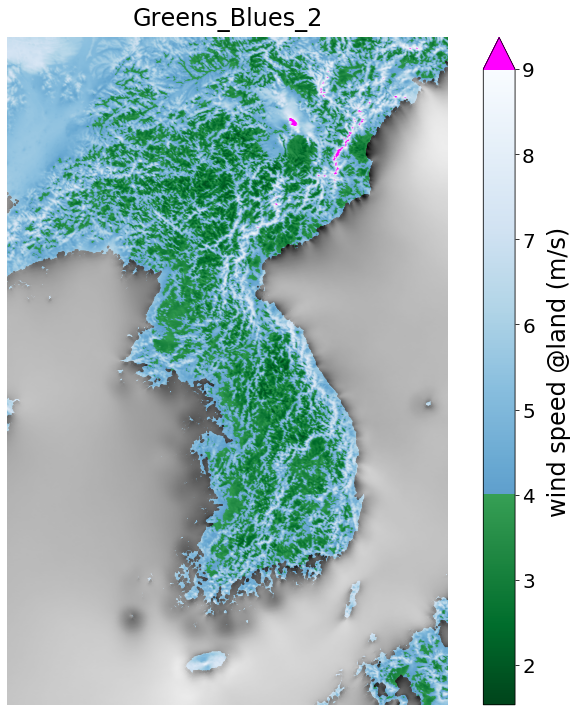

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))

cmap = Greens_Blues_2  # colormap 지정
cmap.set_over("magenta")  

# 육지 : viridis
im = ax.scatter(df_trim["UTM_X"].loc[df_trim["MORPH"]!="sea"], 
                df_trim["UTM_Y"].loc[df_trim["MORPH"]!="sea"], s=1, 
                c=df_trim["wind"].loc[df_trim["MORPH"]!="sea"], cmap=cmap, vmax=9)

# 바다 : gist_gray
ax.scatter(df_trim["UTM_X"].loc[df_trim["MORPH"]=="sea"], 
           df_trim["UTM_Y"].loc[df_trim["MORPH"]=="sea"], s=1, 
           c=df_trim["wind"].loc[df_trim["MORPH"]=="sea"], cmap="gist_gray", vmax=9)

ax.set_aspect("equal", "box")
ax.set_xlim(-80000, 700000)
ax.set_ylim(3620000, 4800000)
ax.axis("off")  
ax.grid("off")  

ax.set_title("Greens_Blues_2", fontsize=24, pad=12)

cbar = plt.colorbar(im, ax=ax, extend="max")    # extend=max 추가
cbar.set_label("wind speed @land (m/s)", fontsize=24, labelpad=12)           
cbar.ax.tick_params(labelsize=20)                         

plt.tight_layout()
plt.savefig("26_ccmap_code2_11.png")
plt.show()

### 1.2. Data

#### 1.2.1 Data to Color, Color to Lightness